[codebasics](https://www.youtube.com/watch?v=FB5EdxAGxQg&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=12&t=0s)

In [8]:
%matplotlib inline

In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
print(dir(iris))
print()

# print(iris.DESCR)
# print()

# print(type(iris.data))
# print(type(iris.feature_names), iris.feature_names)
# print(type(iris.filename), iris.filename)
# print(type(iris.target))
# print(type(iris.target_names), iris.target_names)
# print()

print(iris.data.shape)
print(iris.target.shape)
print()

print(iris.data[0])
print(iris.target[0])

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

<class 'numpy.ndarray'>
(150, 4)
(150,)

[5.1 3.5 1.4 0.2]
0


In [28]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
print(x.head())
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


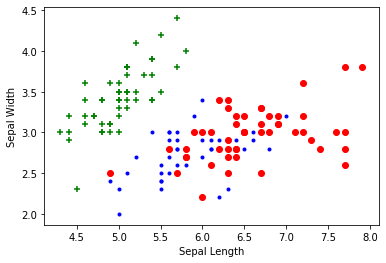

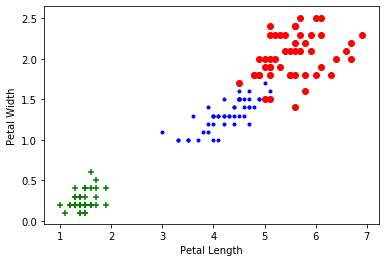

In [32]:
import matplotlib.pyplot as plt

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df0 = df.iloc[:50, :]
df1 = df.iloc[50:100, :]
df2 = df.iloc[100:, :]

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="red", marker='o')
plt.show()

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red", marker='o')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)
print(model.predict([[4.8,3.0,1.5,0.3]]))
print(model.predict([[4.8,3.0,1.5,0.3], [4.8,3.0,2.0,2.3]]))
print(model.score(x_test, y_test))

[0]
[0 1]
0.9666666666666667


/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Tune parameters**

**1. Regularization (C)**

In [36]:
model_C = SVC(C=1)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9666666666666667

In [37]:
model_C = SVC(C=10)
model_C.fit(x_train, y_train)
model_C.score(x_test, y_test)

/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

**2. Gamma**

In [38]:
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.9666666666666667

In [39]:
model_g = SVC(gamma=1)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.9666666666666667

**3. Kernel**

In [40]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)
model_linear_kernal.score(x_test, y_test)

1.0

**Exercise**

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size
